In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import keras.datasets as kds
import numpy as np
import matplotlib.pyplot as plt

# Biliotecas para projeção / redução de dimensionalidade
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA, PCA

2025-01-28 11:14:25.155045: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-28 11:14:25.328514: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-28 11:14:25.578641: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738073665.781542  221544 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738073665.844955  221544 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-28 11:14:26.214169: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = kds.mnist.load_data()

# Estamos normalizando os dados, convertendo-os para valores entre 0 e 1
# Originalmente, estavam entre 0 e 255
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# x_train.shape[1:] = 784
# Assim, estamos forçando as imagens a assumirem as dimensões de 28X28
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


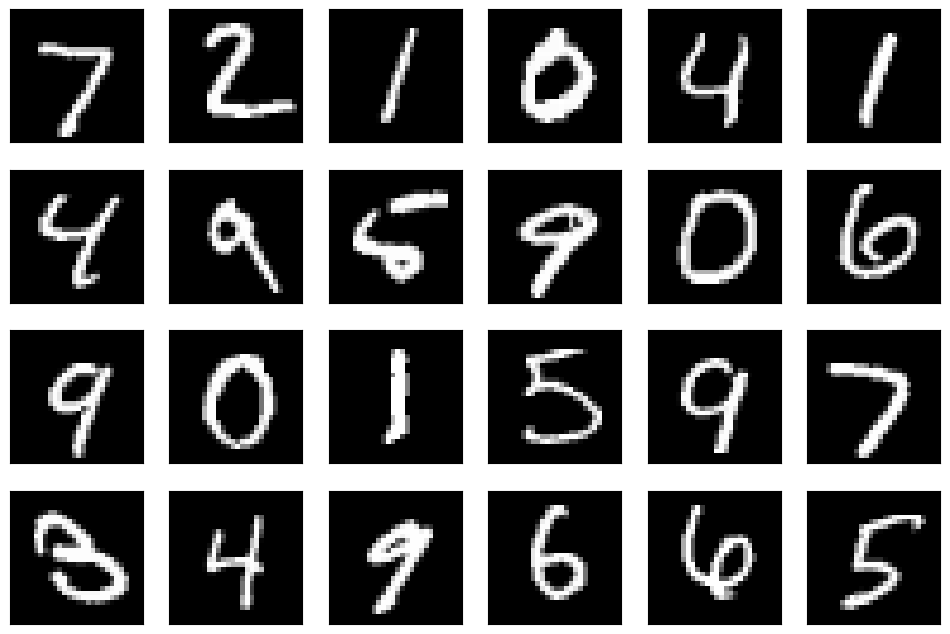

In [3]:
plt.figure(figsize=(12, 8))
for i in range(24):
    ax = plt.subplot(4, 6, i+1)
    # Estamos esticando as imagens para atingirem as dimensões esperadas
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
# Dimensão de embbeding. Fazemos com que os 784 pixels sejam mapeados em apenas 12 neurônios
encoding_dim = 12

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder01 = keras.Model(input_img, decoded)
autoencoder01.summary()

2025-01-28 11:14:36.797240: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12)             │         9,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        10,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,612 (76.61 KB)

 Trainable params: 19,612 (76.61 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
encoder01 = keras.Model(input_img, encoded)

encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder01.layers[-1]
decoder01 = keras.Model(encoded_input, decoder_layer(encoded_input))

In [6]:
autoencoder01.compile(optimizer='Adam', loss='binary_crossentropy')
history = autoencoder01.fit(x_train, x_train,
                            epochs=50,
                            batch_size=256,
                            shuffle=True,
                            validation_data=(x_test, x_test),
                            verbose=1)


2025-01-28 11:14:37.357181: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/50


2025-01-28 11:14:37.907067: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.4350 - val_loss: 0.2364
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.2224 - val_loss: 0.1911
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1874 - val_loss: 0.1742
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1731 - val_loss: 0.1653
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1652 - val_loss: 0.1601
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1609 - val_loss: 0.1573
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1582 - val_loss: 0.1555
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1564 - val_loss: 0.1538
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1548 - val_loss: 0.1524
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1537 - val_loss: 0.1513
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1523 - val_loss: 0.1502
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/ste

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


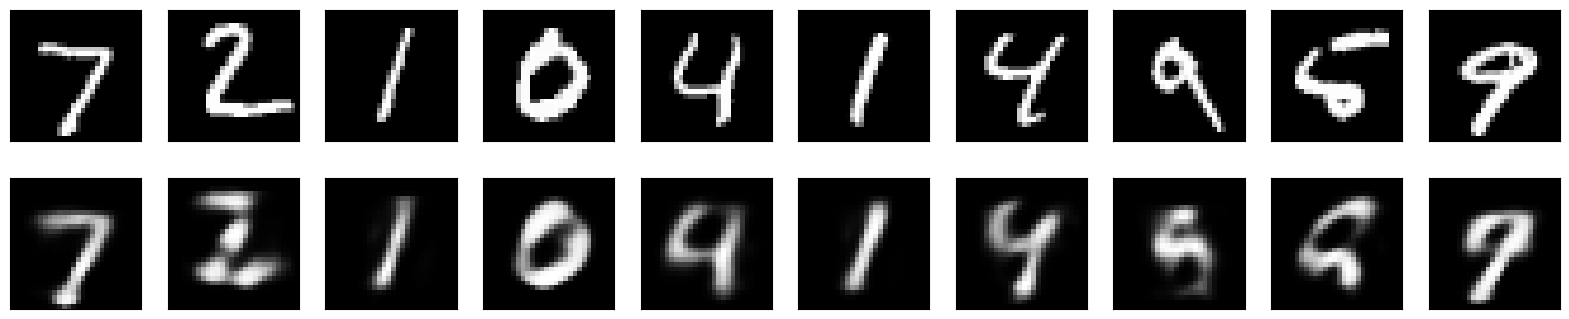

In [7]:
decoded_img01 = autoencoder01.predict(x_test)

n = 10 # imagens visualizadas
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstrucao
    # original
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_img01[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()